# Visualizing SourceTracker 2 Results

Once you have run `sourcetracker2` to produce the mixing proportions of our sources to your sink samples, you'll likely want to visualize the results for understanding your scientific question of interest. Given that many individuals are using IPython notebooks inline for analysis, I'll demonstrate some quick ways to visualize the results in a notebook using `pandas`. 

** The results files are simple tab-delimited text documents, which will make importing into R, Excel, MATLAB, or your favorite visualization package very easy!**

In [2]:
# Import packages of interest
# You might need to install these in your local environment
# which can be easily accomplished with $pip (package)
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [4]:
# Move into our tiny test directory
cd ../data/tiny-test/

/Users/lkursell/Desktop/github/SourceTracker2/data/tiny-test


In [5]:
# read in the mixing proportions result file to a pandas DataFrame
# sep='\t' to denote tab delimited file
# index_col=0 to denote that pandas should set the index values as the SampleIDs
results = pd.read_csv('mixing_proportions/mixing_proportions.txt', sep='\t', index_col=0)
results

,drainwater,seawater,sewage,Unknown
SampleID,,,,
s0,0.3090,0.3258,0.2475,0.1177
s1,0.2701,0.3263,0.2870,0.1166
s2,0.3019,0.2781,0.2838,0.1362
s3,0.2997,0.2783,0.2763,0.1457
s6,0.2848,0.2788,0.3152,0.1212


The above table shows us that we had 5 sink samples and 4 possible source environments (including the Unknown).

The `pandas` package has built in plotting features (built upon matplotlib), that allow for quick visualization.

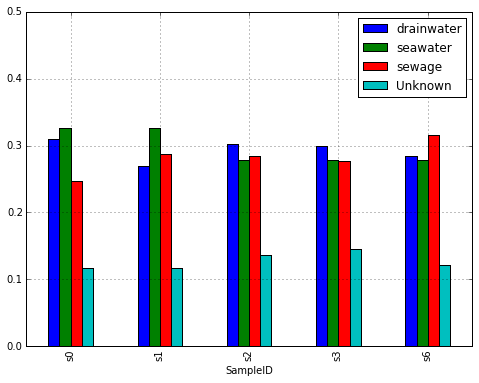

In [7]:
results.plot(kind='bar', grid=True, figsize=(8,6), ylim=(0,0.5))

If the user wanted to plot the standard deviations for the draws for estimating the mixing proportions, simply create a new pandas dataframe with the `mixing_proportions_stds.txt`, and pass that dataframe into the plotting function with the `yerr` argument.

In [11]:
stdevs = pd.read_csv('mixing_proportions/mixing_proportions_stds.txt', sep='\t', index_col=0)

In [9]:
stdevs

,drainwater,seawater,sewage,Unknown
SampleID,,,,
s0,0.062682,0.062384,0.050993,0.035468
s1,0.063445,0.056136,0.040237,0.035828
s2,0.064562,0.074930,0.080901,0.044328
s3,0.105637,0.085666,0.060361,0.022450
s6,0.069479,0.069928,0.079841,0.033834


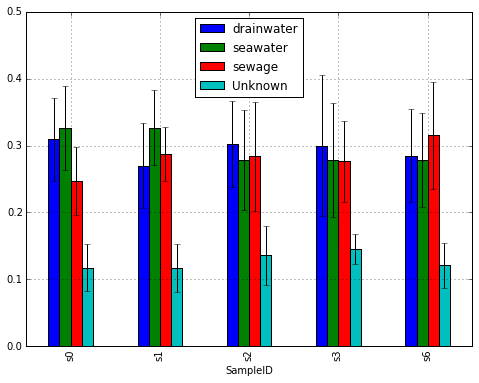

In [12]:
# Plot mixing proportions with yerr
results.plot(kind='bar', grid=True, figsize=(8,6), ylim=(0,0.5), yerr=stdevs)

Pandas also allows the user to specify which columns of interest to plot:

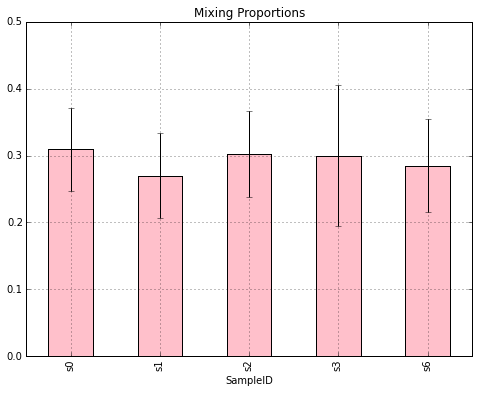

In [19]:
# Plotting only the drainwater source
results['drainwater'].plot(kind='bar', grid=True, figsize=(8,6), ylim=(0,0.5), yerr=stdevs, color='pink',
                          title='Mixing Proportions')

Or, if the user wants to use subplots, pandas also allows for that:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1078be610>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1078a2810>], dtype=object)

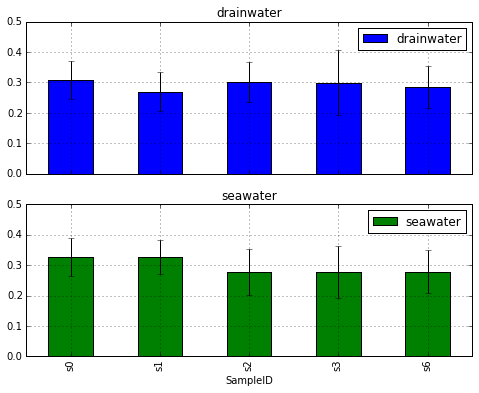

In [20]:
# Plot mixing proportions with yerr
results[['drainwater', 'seawater']].plot(subplots=True, kind='bar', grid=True, figsize=(8,6), ylim=(0,0.5), yerr=stdevs)

** Matplotlib options **

Because pandas uses matplotlib in the background, you can use the matplotlib API to alter your graphs:

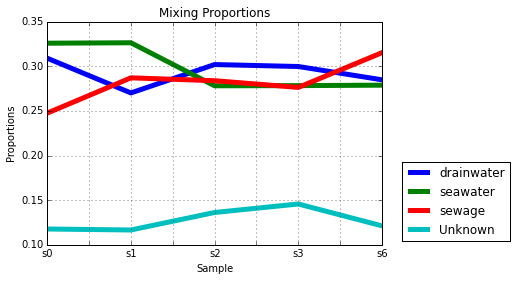

In [30]:
# set figure in matplotlib
fig, ax = plt.subplots(1,1)

# read in the dataframe
# use 'ax=ax' to assign the dataframe to the matplotlib axes object
results.plot(kind='line', lw=5, ax=ax)

# set options
ax.set_ylabel('Proportions')
ax.set_xlabel('Sample')
ax.set_title('Mixing Proportions')

# move legend
ax.legend(bbox_to_anchor=(1.4, 0.4))